In [7]:
import pandas as pd
import numpy as np
from pandas import Timestamp

In [8]:
from lumina.empyrical.gentic.pyplot_drawer import plot_his_profit

In [9]:
method = 'aicso0'
task_id = '200036'

In [10]:
time_periods = {
    'train_time': (Timestamp('2022-07-25 09:31:00'), Timestamp('2024-05-29 13:22:00')),
    'val_time': (Timestamp('2024-05-29 13:23:00'), Timestamp('2024-12-05 10:15:00')),
    'test_time': (Timestamp('2024-12-05 10:16:00'), Timestamp('2025-03-13 15:00:00'))
}

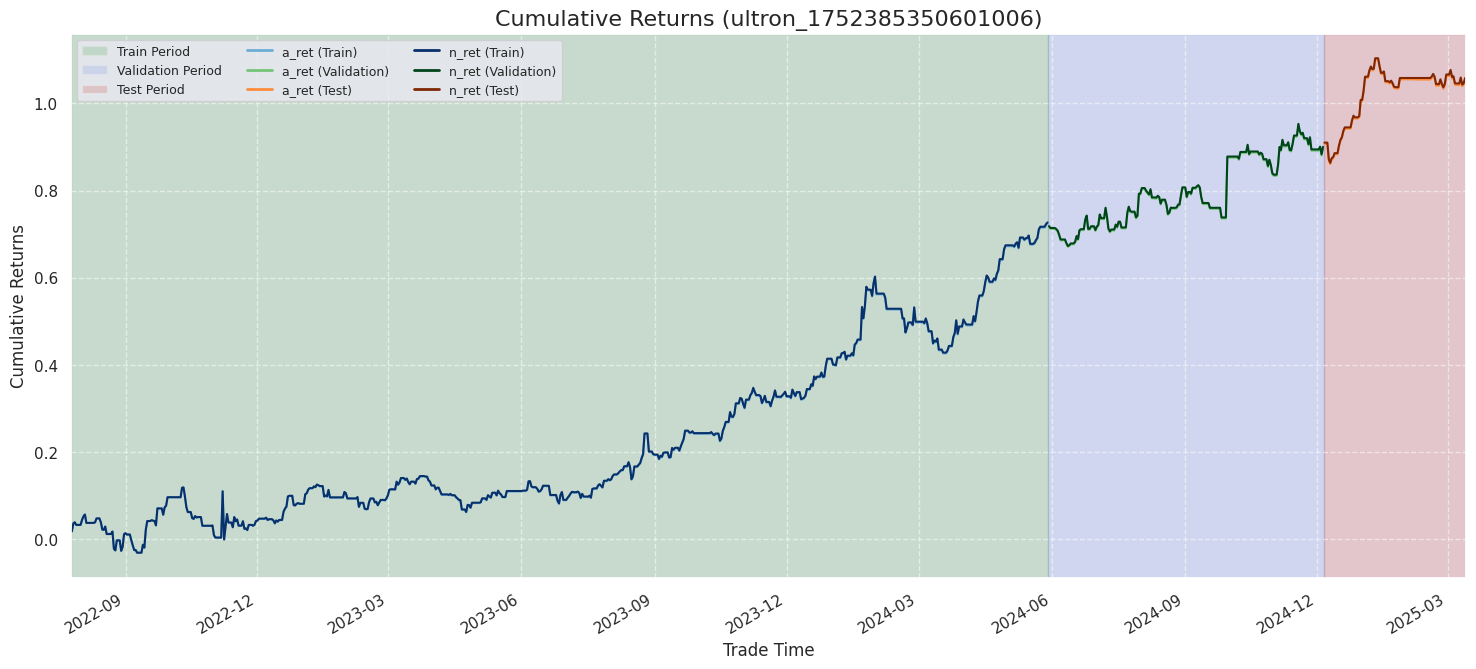

In [13]:
name = 'ultron_1752385350601006'
temp = "temp/{0}/{1}/returns/{2}.feather".format(method,task_id,name)
cumulative_returns = pd.read_feather(temp).set_index(
    'trade_time').cumsum()  #.plot(figsize=(14,7))
plot_his_profit(cumulative_returns=cumulative_returns, 
                time_periods=time_periods, name=name)

In [5]:
res = [] 

In [6]:
##选择策略费后
def fetch_returns(name):
    temp = "temp/aicso2/200037/returns/{0}.feather".format(name)
    cumulative_returns = pd.read_feather(temp).set_index(
        'trade_time')['a_ret'].cumsum() 
    cumulative_returns.name = name
    return cumulative_returns
    

programs = [ 'ultron_1751492470196206']
for program in programs:
    print(program)
    cumulative_returns = fetch_returns(name=program)
    res.append(cumulative_returns)


ultron_1751492470196206


In [7]:
##选择策略费后
def fetch_returns(name):
    temp = "temp/aicso0/200036/returns/{0}.feather".format(name)
    cumulative_returns = pd.read_feather(temp).set_index(
        'trade_time')['a_ret'].cumsum() 
    cumulative_returns.name = name
    return cumulative_returns
    

programs = [ 'ultron_1752385350601006']
for program in programs:
    print(program)
    cumulative_returns = fetch_returns(name=program)
    res.append(cumulative_returns)


ultron_1752385350601006


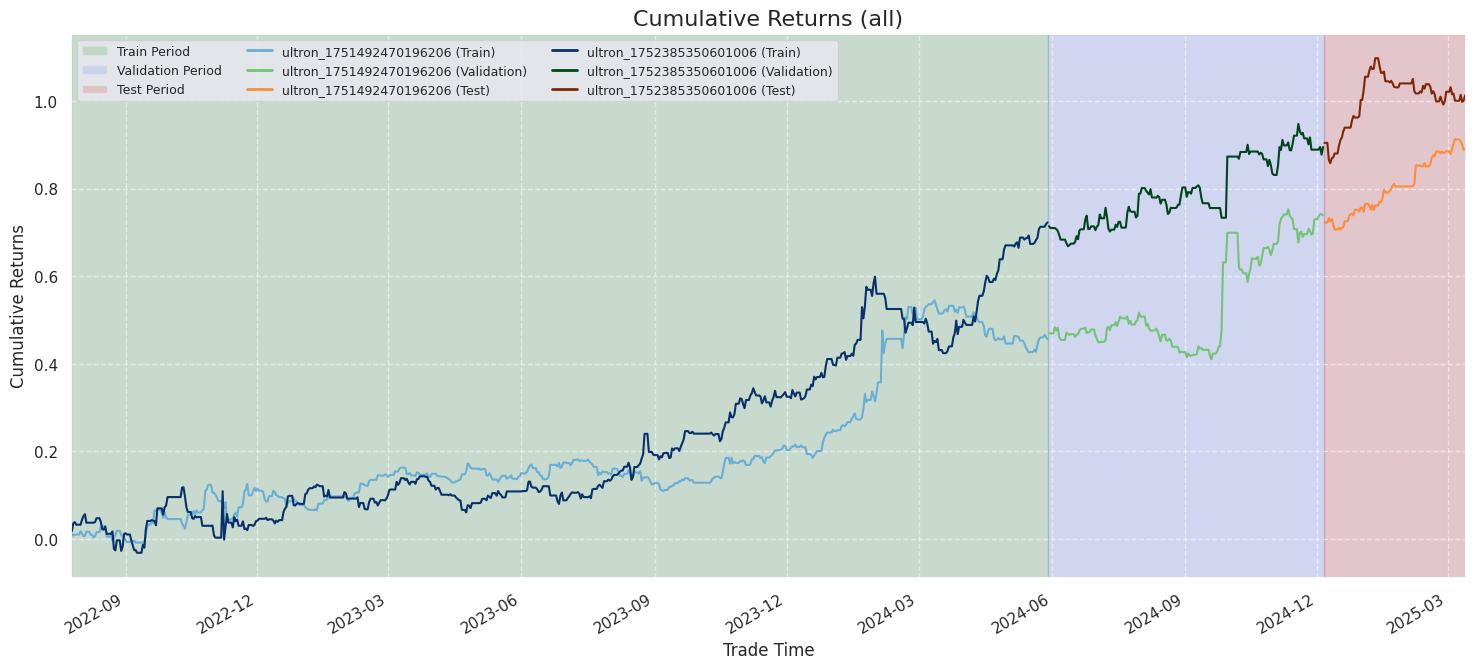

In [8]:


plot_his_profit(cumulative_returns=pd.concat(res,axis=1), 
                time_periods=time_periods, name='all')